## Event Driven Simulation 

### Scheduling CoMP

In [1]:
import eds
import simpy
import numpy as np
import pandas as pd
import scipy
SCHEDULE_T=2
import matplotlib.pyplot as plt
import show as sh

In [2]:
env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list2=np.array([])
#define UEs

    
max_prb=50
thr=6
cluster=[19,20]

ue_nr=100

x=np.append(np.ones(ue_nr)*19,np.ones(ue_nr)*20)
y=np.append(np.ones(ue_nr)*20,np.ones(ue_nr)*19)
sinr=np.random.randint(-5,15,ue_nr*2)
sinr2=np.random.randint(0,18,ue_nr*2)

rt_nrt=np.array([])
rt_nrt=np.append(rt_nrt,np.ones(ue_nr*2)*0)

df=pd.DataFrame()
df['PCI Serving']=x
df['PCI Coord']=y
df['JT_1 SINR [lin]']=sinr
df['JT_2 SINR [lin]']=sinr2
df['usage']=rt_nrt
df['id']=np.arange(0,ue_nr*2)
   
df['PCI Serving']=df['PCI Serving'].astype('int')
df['PCI Coord']=df['PCI Coord'].astype('int')

df['JT_1 SINR [lin]']=df['JT_1 SINR [lin]'].astype('int')
df['JT_2 SINR [lin]']=df['JT_2 SINR [lin]'].astype('int')

In [3]:
df2=df

In [4]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,160))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\eds.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


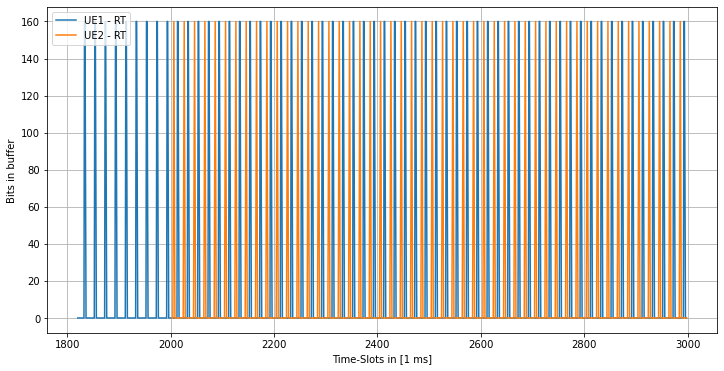

In [5]:
plt.figure(figsize=(12,6))
plt.plot(list(ue_all[20].mon.keys())[1000:3000],list(ue_all[20].mon.values())[1000:3000],label='UE1 - RT')
plt.plot(list(ue_all[30].mon.keys())[1000:3000],list(ue_all[30].mon.values())[1000:3000],label='UE2 - RT')
#plt.plot(list(ue_all[47].mon.keys()),list(ue_all[47].mon.values()),label='UE3 - RT')
#plt.plot(list(ue_list[120].mon.keys())[1000:3000],list(ue_list[120].mon.values())[1000:3000],label='UE4')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

In [6]:
df=eds.ue_to_df(ue_all[0:49])

No handles with labels found to put in legend.


-7.885819871544797e-05
0
0.08800164880118366
1
0.10849848819667329
1
0.10998235624966046
1
0.09922253168861417
1
0.0844683142021907
1
-57.510173678652606
0
0.8021623674601353
1
0.0
0
0.7789518210506552
1
0.0
0
0.5553046961670693
1
0.0844683142021907
1
0.0
0
0.0
0
0.13524533851203557
1
0.07138870725957869
1
0.0
0
-0.00012959310360383114
0
0.07383412868600114
1
0.0
0
-48.70776988256892
0
0.07730061785158338
1
0.8019020564554058
1
0.0719793301847016
1
0.11487724202110527
1
-0.00044708592582543005
0
-0.0012849319104057955
0
-43.8043364059586
0
-23.494633343608996
0
0.08010642734634921
1
0.0
0
0.06912153493778828
1
-39.77289329520476
0
0.09051037748770696
1
0.08211539827513992
1
0.12476435364789928
1
0.10658042003457435
1
-29.91428651472531
0
-0.0011203083235544753
0
0.0
0
0.7824650042293602
1
-21.159111785660233
0
0.07308212334380393
1
-30.20377034528844
0
0.7793254337055355
1
-49.201228481243916
0
-12.75615758994263
0
0.0
0
0.08380567145573892
1
0.8356257351825658
1
0.7799652385003242
1
0

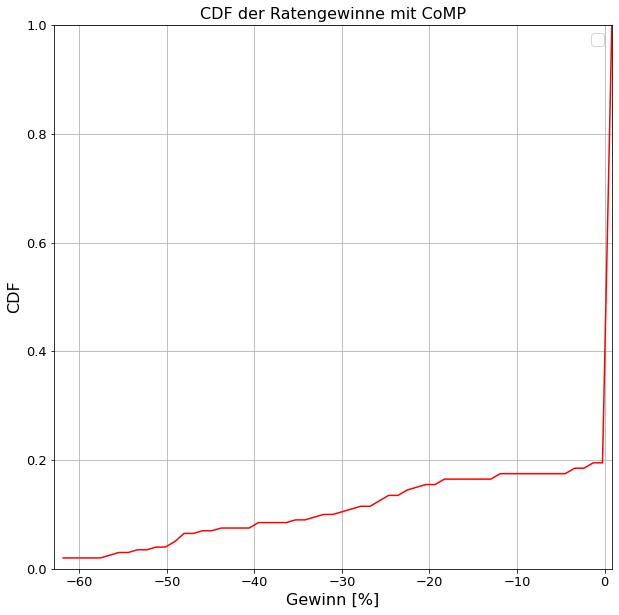

In [7]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [8]:
print('comp prb perc',prb_number_comp/(prb_number_normal+prb_number_comp))
print('comp user perc',len(ue_comp)/len(ue_all))

comp prb perc 0.66
comp user perc 0.395


In [9]:
df=df2
env=simpy.Environment()

In [10]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,1600))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\eds.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


No handles with labels found to put in legend.


-50.42277826851041
0
100.99496812588464
1
236.71680192368885
1
147.90356055928194
1
-33.47484957429303
1
119.31475530434624
1
-71.23094951083681
0
380.6875017238931
1
-48.20474003572496
0
367.9392172685903
1
-51.03545271167729
0
265.99808814058537
1
-13.3581732961919
1
-51.12777067964044
0
-52.28585771762373
0
98.64120306616083
1
186.82646689346706
1
-48.8085783460369
0
-49.52191467380429
0
216.40587991258613
1
-52.39509392329658
0
-49.26924165692259
0
105.32867157073294
1
289.009103267881
1
96.15703801534916
1
165.6180616037632
1
-48.73242042664591
0
-51.22978685402229
0
-49.032083643929745
0
-49.953856270173006
0
126.20726355740426
1
-50.39936792961469
0
167.9109395629676
1
-48.95444683191026
0
177.01725272326195
1
142.57398102031294
1
235.71073559778236
1
54.75164986814733
1
-50.34253963376324
0
-50.23386042659253
0
-50.46460768642083
0
162.04771539927782
1
-49.48987815756832
0
-12.23479859254769
1
-51.076456496104306
0
77.83681800373132
1
-49.48776942329758
0
-51.196871628692755
0


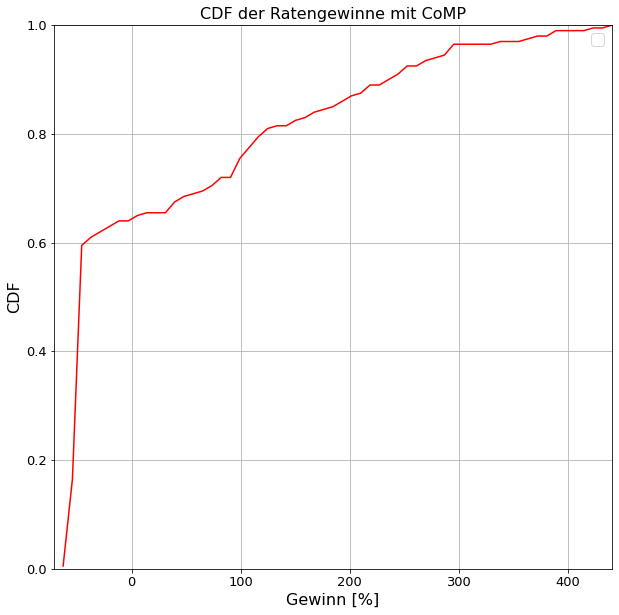

In [11]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)


sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [12]:
df=df2
env=simpy.Environment()
max_prb=30


ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,1600))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\eds.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


No handles with labels found to put in legend.


-51.89196649644868
0
110.21930605075295
1
83.96164880470988
1
144.76131300577327
1
-42.98215518751921
1
118.75424158660803
1
-61.31907117192923
0
42.710773661998246
1
-50.907551909504846
0
48.68888510763518
1
-51.16104189322226
0
278.836557466298
1
-38.30459646879527
1
-51.80603186477948
0
-49.97587079751828
0
71.74573434887954
1
187.976894523652
1
-51.83531001966442
0
-49.386523720375806
0
205.92399050256404
1
-52.55640151609422
0
-50.32527674402792
0
97.08958845774518
1
24.137376154179524
1
24.139531568483875
1
168.11211448470132
1
-51.895782001047905
0
-50.15354136728662
0
-49.93075630616249
0
-49.125968932786826
0
122.73579297203918
1
-51.756748688611765
0
162.62405989871266
1
-50.90809654410007
0
28.885825722662652
1
147.33994826355868
1
230.19836845203025
1
48.926633397245745
1
-48.75986791693413
0
-51.75585353159426
0
-50.00968563953608
0
-4.309728387585543
1
-49.124757574971234
0
-7.453750483285926
1
-50.00247804234492
0
71.93281051101464
1
-50.24727165418154
0
-49.815883722729

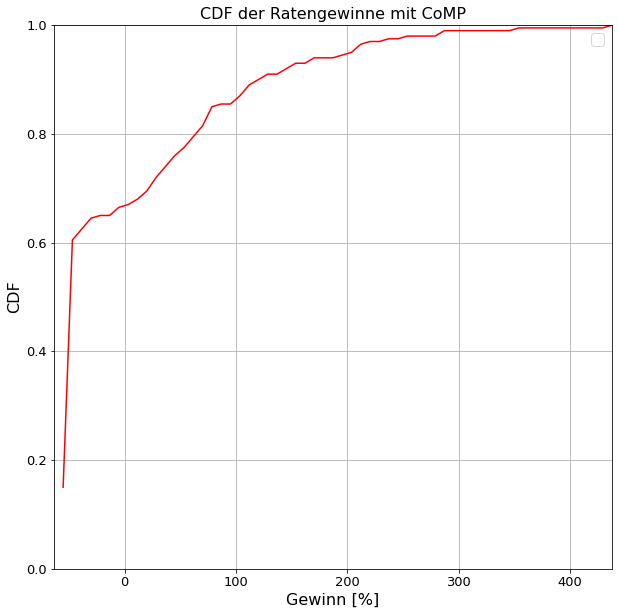

In [13]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [14]:
df=df2
env=simpy.Environment()
max_prb=30

ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=29
prb_number_normal=1

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,1600))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\eds.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


No handles with labels found to put in legend.


-94.95027395166701
0
207.65303935243585
1
169.40684641921357
1
266.64306385784846
1
-17.24119936860592
1
216.96710973629075
1
-96.74116424116423
0
110.12808205004907
1
-95.20442729401904
0
109.44411186078607
1
-94.95145652748572
0
441.4475229813808
1
-9.582413590090312
1
-95.03197636337296
0
-95.19069233437007
0
148.26626834034303
1
315.94858897883944
1
-95.08320061518029
0
-95.0478687764442
0
366.23569540862724
1
-94.9949280955162
0
-95.00050135061068
0
189.69614373294297
1
105.47170351627426
1
81.3063880901362
1
283.2204513976325
1
-95.16807855835151
0
-94.78680126517426
0
-95.04436664174267
0
-94.9121591109359
0
208.85258059244342
1
-95.07865838229691
0
299.41723444279836
1
-95.06216873151773
0
85.58724714004364
1
256.7226206823751
1
380.09373789576097
1
113.70538510195907
1
-95.15140661646655
0
-95.1767917549362
0
-95.26090929085746
0
70.76671363942589
1
-94.96534283034167
0
35.42140966263434
1
-95.0001373320093
0
141.94406981396273
1
-94.99275543167393
0
-95.00013070661917
0
-95.1

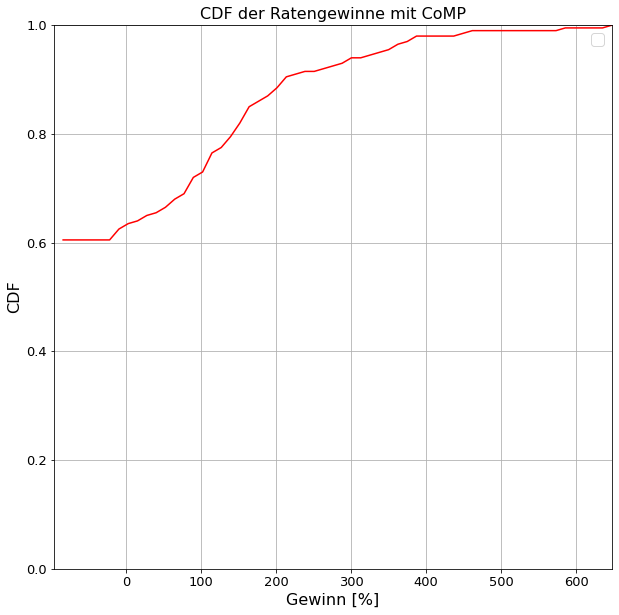

In [15]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)
